In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Day 55 Ensemble_Techniques_XGBM_Data.csv")

# Display dataset info
print(df.info())

# Show the first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Feature_3  1000 non-null   float64
 3   Feature_4  1000 non-null   float64
 4   Feature_5  1000 non-null   float64
 5   Feature_6  1000 non-null   float64
 6   Target     1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0  -1.322458   1.748113  -1.351074  -1.445921   1.792659  -2.741316       0
1   0.054934   0.695617  -1.245717   0.073310   0.550877  -1.326263       1
2   1.857702  -0.839524   1.497432   1.324024  -1.018612   1.087993       1
3  -1.751829  -0.215598  -1.154363   2.777598  -0.872098  -0.605270       0
4  -0.009300   0.220160   0.000207  -0.677684   0.349892  -0.165382       0


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


         Feature_1    Feature_2    Feature_3    Feature_4    Feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.000416     0.021475    -0.012107    -0.048433     0.029704   
std       1.003111     0.818102     1.009586     1.322137     0.858969   
min      -2.991136    -2.787107    -3.019512    -3.836929    -3.281236   
25%      -0.710385    -0.517717    -0.695964    -1.021008    -0.456377   
50%       0.000185     0.128403     0.003796    -0.224366     0.050139   
75%       0.665780     0.539337     0.664881     0.969732     0.544342   
max       3.926238     2.817960     3.243093     3.994644     2.872178   

         Feature_6       Target  
count  1000.000000  1000.000000  
mean     -0.022545     0.497000  
std       1.403956     0.500241  
min      -4.543441     0.000000  
25%      -1.054538     0.000000  
50%      -0.197133     0.000000  
75%       0.990549     1.000000  
max       4.020262     1.000000  
Feature_1    0
Feature_2   

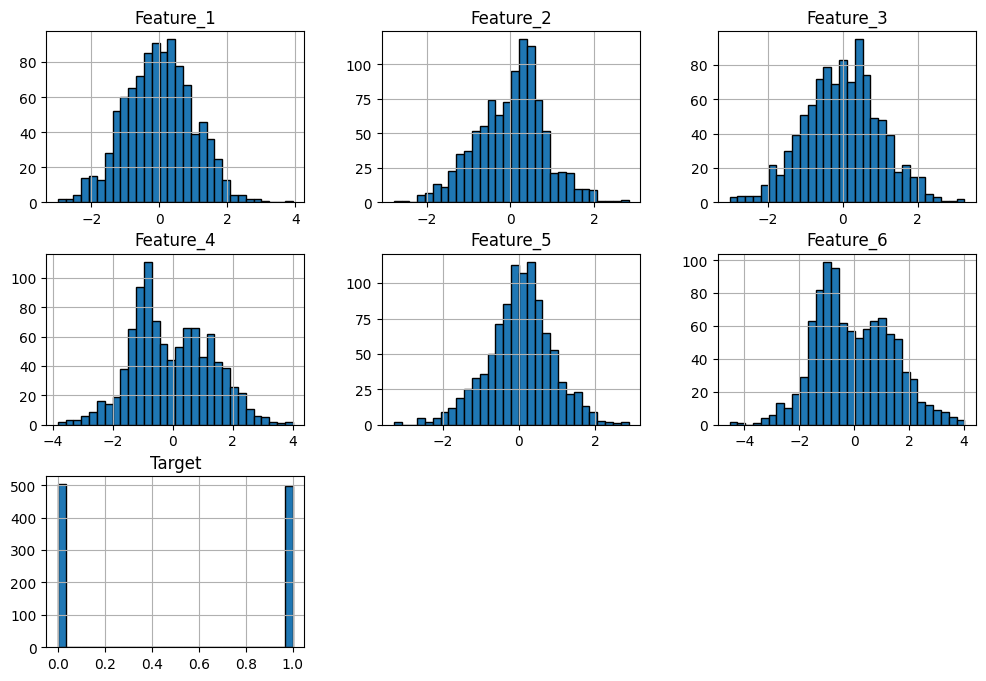

In [15]:
# Plot feature distributions
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.show()


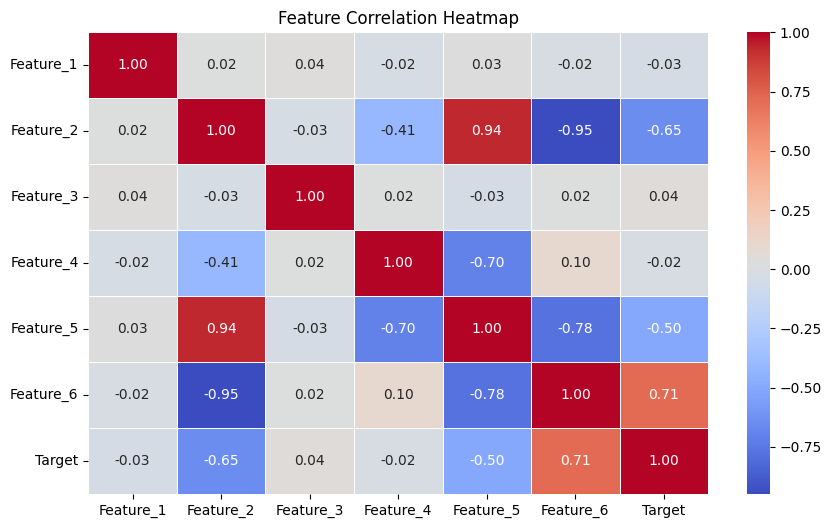

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [17]:
df.fillna(df.mean(), inplace=True)


In [18]:
df.dropna(inplace=True)


In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["Target"])  # Replace "Target" with the actual column name
y = df["Target"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Performance Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       101
           1       0.91      0.90      0.90        99

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200



In [21]:
import pandas as pd

# Get feature importances
feature_importance = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importance)


Feature Importance:
 Feature_6    0.372723
Feature_2    0.264173
Feature_4    0.156607
Feature_5    0.124403
Feature_1    0.044359
Feature_3    0.037735
dtype: float64


In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric="logloss")
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Performance Metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       101
           1       0.88      0.89      0.88        99

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.2]
}

# Perform Grid Search
xgb_grid = GridSearchCV(XGBClassifier(eval_metric="logloss"), param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", xgb_grid.best_params_)


Best Hyperparameters: {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}


In [12]:
from sklearn.metrics import roc_auc_score

# Compute ROC-AUC Scores
roc_rf = roc_auc_score(y_test, y_pred_rf)
roc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Compare Results
print(f"Random Forest ROC-AUC: {roc_rf:.4f}")
print(f"XGBoost ROC-AUC: {roc_xgb:.4f}")


Random Forest ROC-AUC: 0.9049
XGBoost ROC-AUC: 0.8850
